In [9]:
%logstop
%logstart -rtq ~/.logs/ML_K_Nearest_Neighbors.py append
import seaborn as sns
sns.set()

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# $K$-Nearest Neighbors

The $K$-Nearest Neighbors (KNN) is a simple machine learning algorithm that can be used for both regression and classification. It works by finding the nearest $K$ neighbors of an observation and using those neighboring points to make a prediction. KNN naturally handles multiclassification problems. In this notebook, we will discuss how KNN works and the key hyperparameters of the algorithm.

## Finding the neighbors

The KNN model makes predictions by determining the $K$ neighbors of test points from a training set. The neighbors are the $K$ training points that are closest to the test point, using distance as the metric. Commonly, the Euclidean distance is used but other distance metrics work as well. The generalized distance metric is called the Minkowski distance, defined as 

$$ d_j = \left(\sum_{i} \left |x_i - X_{ji}\right |^{p} \right)^{1/p}, $$

where $d_j$ is the distance between training point $j$ to the point $x_i$ and $p$ is an integer. When $p=2$, the Minkowski distance is the just the standard Euclidean distance. With the $K$ neighbors identified, the algorithm can make a prediction with the label values of the neighbors. For regression, the predicted value is the mean of the $K$ neighbors. For classification, the predicted label is the class with the plurality, i.e., which class is most represented among the neighbors.

Since the KNN model calculates distances, the data set needs to be scaled for the model to work properly. All the features should have a similar scale. The scaling can be accomplished by using the `StandardScaler` transformer.

We will demonstrate the usage of the KNN algorithm with the iris data set. For visualization purposes, we will only use two of the four features, just the petal width and length. 

In [4]:
from ipywidgets import interact, IntSlider
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

data = load_iris()
X = data['data']
y = data['target']

Xt = StandardScaler().fit_transform(X)

def plot_neighbors(n_neighbors=1):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(Xt[:, 2:], y)
    
    X1, X2 = np.meshgrid(np.linspace(-2, 2), np.linspace(-2, 2))
    y_pred = knn.predict(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))))
    plt.contourf(X1, X2, y_pred.reshape(50, 50)/2, cmap='viridis', alpha=0.25, vmin=0, vmax=0.95)

    plt.scatter(*Xt[:, 2:].T, c=y, cmap='viridis');

interact(plot_neighbors, n_neighbors=IntSlider(min=1, max=36, step=2, description='neighbors'));

interactive(children=(IntSlider(value=1, description='neighbors', max=36, min=1, step=2), Output()), _dom_clas…

**Questions**
* How does increasing the number of neighbors control the bias and variance of the model?
* Instead of using the Minkowski distance, KNN can use the cosine similarity. The cosine similarity measures the angle between two vectors. What are cases in which using the cosine similarity metric would be preferred?
* How can one use distances of the $K$ nearest neighbors in calculating the predictive value?

* Increasing the number of neighbors smoothens out the decision boundary

## Variance vs bias

With machine learning models, it is important to understand how altering hyperparameters affects the bias-variance tradeoff. For KNN, how does increasing the number of neighbors affect the bias and variance error? One good way to answer these types of questions is to consider the extreme cases. Let's first consider the case where we only have one neighbor. With one neighbor, the predicted value will be highly variable on the training data, running the risk of adapting to the idiosyncrasies of data set. You can imagine how the predicted value will vary widely depending on the data set we use to train the model because we rely on one point to make a prediction. Consider the other extreme, were the number of neighbors is equal to the training set. If we use the entire training data to make a prediction, we will always predict the same value, regardless where our test observation is located. For regression, we always predict the mean label value of the training data. For classification, we predict the modal class. Since our model at this extreme does not take into consideration the feature values of the observation we want to make prediction, it is simple model with high bias error. For the iris data set, let's determine the right number of neighbors.

In [5]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
knn = KNeighborsClassifier(n_neighbors=2)

pipe = Pipeline([('scaler', StandardScaler()), ('clf', knn)])
pipe.fit(X_train, y_train)

param_grid = {'clf__n_neighbors': range(1, 36, 1)}
grid_search = GridSearchCV(pipe, param_grid, cv=20, n_jobs=2)
grid_search.fit(X, y)

GridSearchCV(cv=20,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        KNeighborsClassifier(n_neighbors=2))]),
             n_jobs=2, param_grid={'clf__n_neighbors': range(1, 36)})

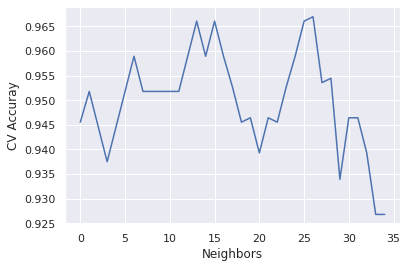

In [6]:
plt.plot(grid_search.cv_results_['mean_test_score'])
plt.xlabel('Neighbors')
plt.ylabel('CV Accuray');

The grid search for the number of neighbors reveals we should use anywhere from 12 to 18. Anything more and our model will become increasingly susceptible to bias error.

## Time and memory complexity

For KNN, the training time complexity is negligible; the algorithm does not need to do anything. The prediction time complexity is $O(n)$, where $n$ is the training set size, as the algorithm needs to calculate the distance from the test point to all points in the training data.

Let's consider the memory requirement for KNN. In order to make a prediction with a KNN model, the algorithm needs the entire training data. Unlike other algorithms that learn from the training data by generating a set of parameters, the KNN always needs to store the training data. Having to store the training data becomes a problem when the data set becomes large. Coupled with the slow prediction times and memory requirements, KNN is not recommended for large data sets.

*Copyright &copy; 2021 WorldQuant University. This content is licensed solely for personal use. Redistribution or publication of this material is strictly prohibited.*